In [4]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.IntervalData import IntervalData
from interClusLib.metric import *
from interClusLib.clustering import IntervalKMeans, IntervalAgglomerativeClustering
from interClusLib.visualization.HeatMap import HeatMap
from interClusLib.visualization import Interval2d, Interval3d ,IntervalParallelCoordinates ,IntervalRadarChart, Dendrogram

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.make_interval_blobs(n_samples=100, n_clusters=4, n_dims = 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0          5.575427         5.747256        -8.002084        -7.556464   
1         -9.780717        -7.745262        -9.229532        -7.734594   
2         -3.667648         0.548633        -2.339993        -0.691375   
3         -5.377501         0.395344        -2.548290        -1.459730   
4          4.470276         5.402462       -10.884063        -8.452896   
..              ...              ...              ...              ...   
95        -0.277834         0.346017        -8.249412        -7.602888   
96         3.545717         3.645717        -8.029816        -4.785462   
97        -9.915396        -9.096331        -7.478326        -5.002456   
98        -9.391439        -8.604571        -7.298043        -6.602733   
99       -11.653279        -8.320803        -8.000639        -7.146

In [5]:
print(type(random_data))      
print(type(random_data.data))  
print(random_data.data.shape)  
print(random_data.get_intervals().shape[0])

<class 'interClusLib.IntervalData.IntervalData'>
<class 'pandas.core.frame.DataFrame'>
(100, 6)
100


In [6]:


hmodel = IntervalAgglomerativeClustering(n_clusters=4, linkage='ward')
hmodel.fit(random_data.get_intervals())

print(hmodel.labels_)

dendrogram_data = hmodel.get_dendrogram_data()

print(dendrogram_data)

# 绘制基本树形图

[1 3 2 2 1 3 0 1 2 3 0 1 0 2 1 1 2 3 1 1 1 2 0 1 2 3 0 3 2 3 0 0 2 2 0 2 1
 2 3 1 1 0 3 2 3 2 2 3 3 3 1 3 0 0 1 2 0 0 1 3 2 3 0 0 2 3 0 0 2 0 3 0 1 1
 2 2 2 2 0 3 3 1 1 1 0 3 0 1 0 1 3 1 2 2 0 0 1 3 3 3]
{'linkage_matrix': array([[ 69.        ,  71.        ,   0.56227877,   2.        ],
       [ 10.        ,  78.        ,   0.57021483,   2.        ],
       [ 75.        ,  93.        ,   0.72561935,   2.        ],
       [ 27.        ,  42.        ,   0.9797699 ,   2.        ],
       [ 43.        ,  45.        ,   0.99149168,   2.        ],
       [ 81.        ,  83.        ,   0.99886521,   2.        ],
       [ 74.        , 102.        ,   1.00127659,   3.        ],
       [ 64.        ,  77.        ,   1.03231683,   2.        ],
       [ 11.        ,  39.        ,   1.08278322,   2.        ],
       [ 58.        ,  82.        ,   1.11435703,   2.        ],
       [ 53.        ,  66.        ,   1.11482166,   2.        ],
       [ 22.        ,  41.        ,   1.12402453,   2.        

Requested clusters: 5, Actual clusters: 5


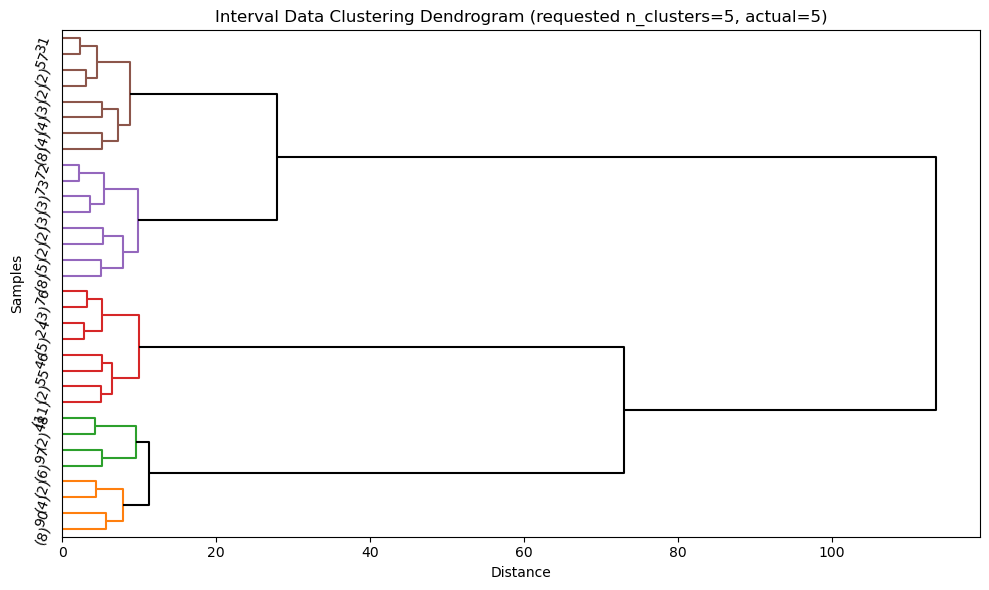

In [7]:
fig, ax, dendro_output = Dendrogram.visualize(
    dendrogram_data=dendrogram_data,
    p=4,
    n_clusters=5,
    title="Interval Data Clustering Dendrogram",
    show_distances= False,
    count_sort= 'descending',
    leaf_rotation=70.,
    truncate_mode='level',
    orientation='right',
    show_leaf_counts=True
)

(<Figure size 1200x800 with 1 Axes>,
 <AxesSubplot:title={'center':'Parallel Coordinates'}>)

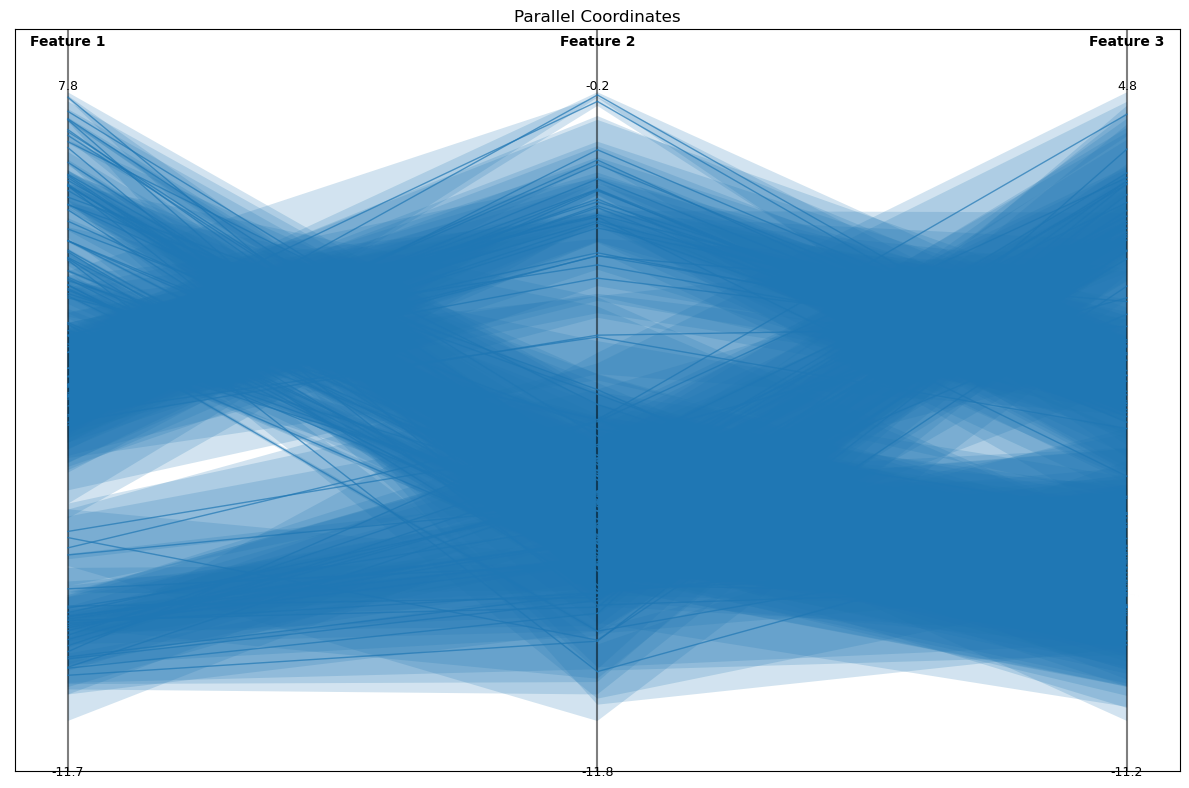

In [10]:

IntervalParallelCoordinates.visualize(intervals = random_data.get_intervals(), 
                                      feature_names= None, 
                                      centroids= None,
                                      labels=None,
                                      alpha=0,
                                      beta = 0,
                                      use_bundling= True)


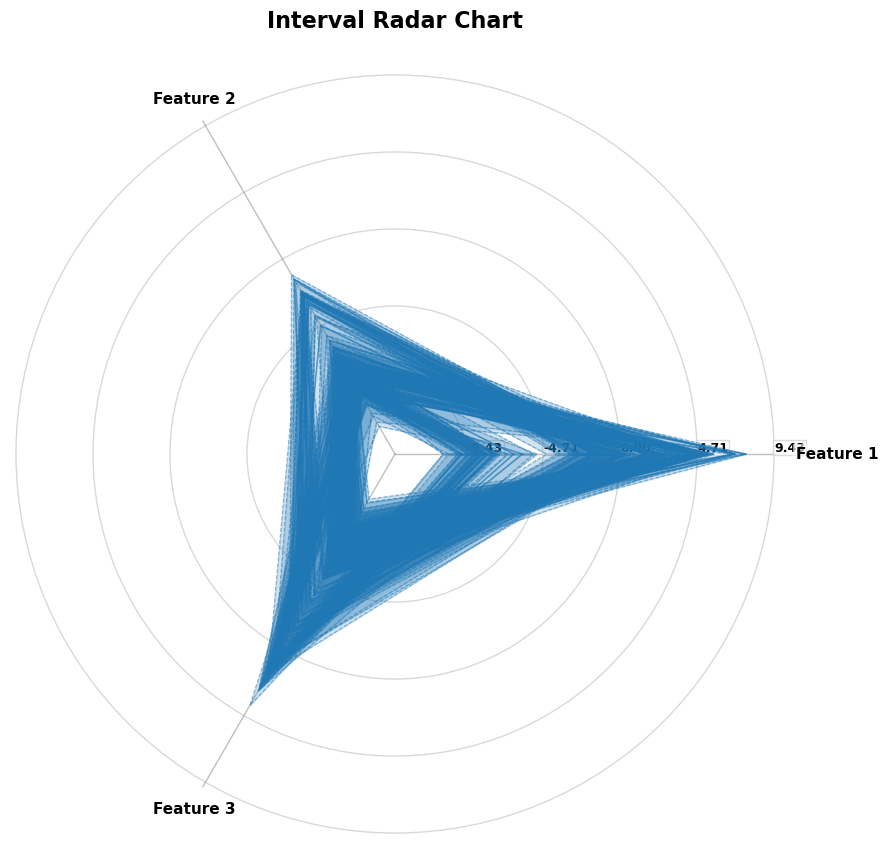

In [12]:
fig, ax = IntervalRadarChart.visualize(
    intervals=random_data.get_intervals(), 
    centroids=None,
    labels=None,
    title="Interval Radar Chart",
    max_samples_per_cluster=50,
)

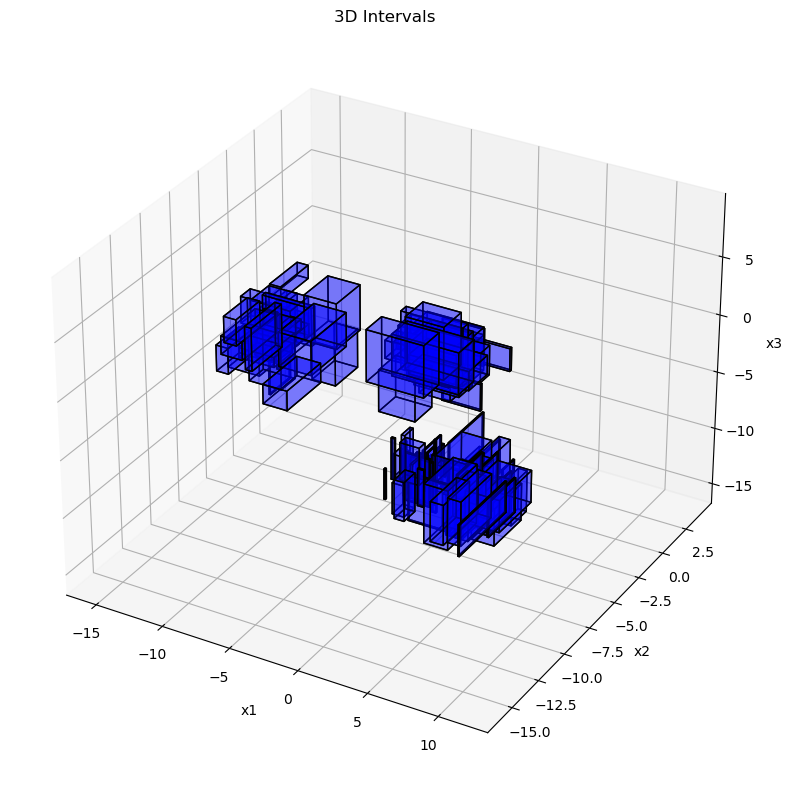

In [13]:
fig, ax = Interval3d.visualize(intervals = random_data.get_intervals(), centroids= None, labels = None)


 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0         -2.509714        -2.409714         4.860907         7.215447   
1         -0.878199        -0.100255        -7.633062        -7.258796   
2         -2.856550        -1.339060        -9.050459        -8.112181   
3         -1.866458        -0.532597       -11.732818        -9.497817   
4         -7.776030        -7.120446        -7.466280        -3.255340   
5        -11.119522       -10.125969        -5.607328        -3.993886   
6         -4.250034        -2.928771         5.915373         8.158179   
7         -3.252418        -2.307398         6.339873        10.256598   
8         -6.228124        -6.128124        -6.450035        -3.345436   
9         -3.326644        -1.651092        -9.951100        -9.545020   
10        -2.420380        -2.320380         6.898755        11.083787   
11        -5.993409        -5.010359         7.753654        10.150510   
12        -8.2

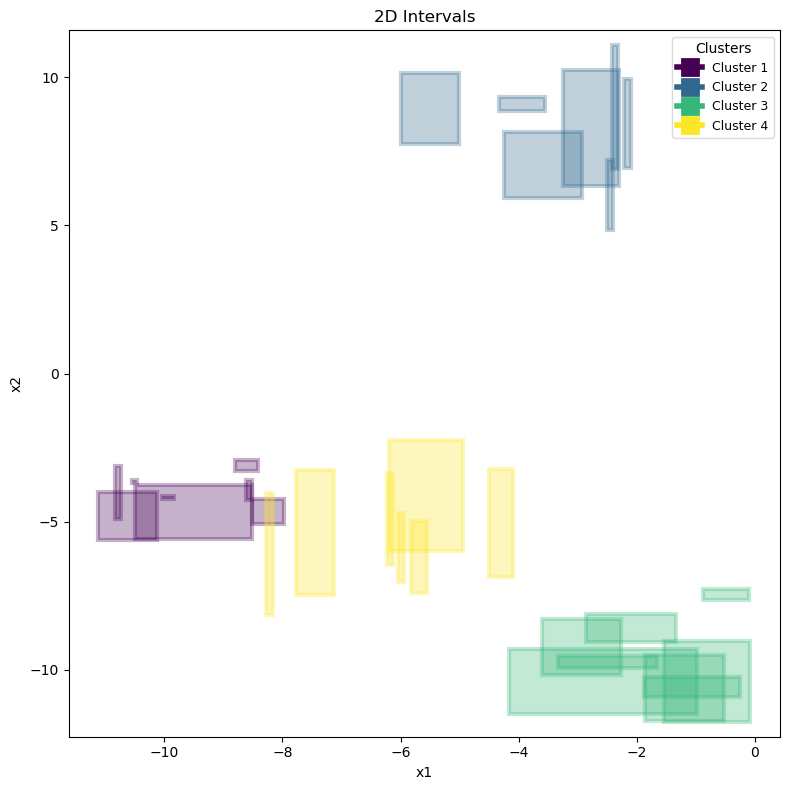

In [ ]:

print("\n Random Interval Data:")
print(random_data.data)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

fig, ax = Interval2d.visualize(intervals = random_data.get_intervals(), centroids= None, labels = model.labels_, fill_intervals=True)